# **Facial Emotion Detection**

## **Problem Definition**
--------------
## **Context**
--------------

Facial emotion recognition is crucial for enhancing human-computer interaction, as a significant portion of human communication is non-verbal and conveyed through facial expressions. Accurate emotion detection can improve applications in mental health, customer service, virtual assistants, and human behavior analysis.


----------------
## **Objective**
----------------

The goal is to develop a deep learning model that can accurately classify facial expressions in images into multiple emotion categories, enabling machines to understand and respond to human emotions.

**The key questions this project is trying to solve/answer are:**<br>

- How accurately can a model classify different facial emotions from images?
- Which deep learning architectures are most effective for this task?
- What are the challenges in recognizing subtle or ambiguous emotions?
- How well does the model generalize to new, unseen faces or datasets?


**Problem formulation:**

The project aim to solve a multi-class image classification problem: Given an image of a human face, predict the correct emotion label (e.g., happy, sad, angry, surprised, etc.) using deep learning techniques.



-------------
## **Dataset**
-------------

The dataset is facial emotions dataset. The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **loading and unziping the data**

In [ ]:
# Import the zipfile module for extracting zip files
import zipfile

# Define the path to the zip file and the extraction directory
zip_path = '/Users/govindasairam/Desktop/Visual Code Studio/PROJECTS/DATASET/Facial_emotion_images.zip'
extract_path = '/Users/govindasairam/Desktop/Visual Code Studio/PROJECTS/DATASET/Facial_emotion_images'

# Extract the contents of the zip file to the specified directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## **Visualizing our Classes**

Let's look at our classes

Unique feature of each emotion, that separates it from the remaining classes

### **Happy**

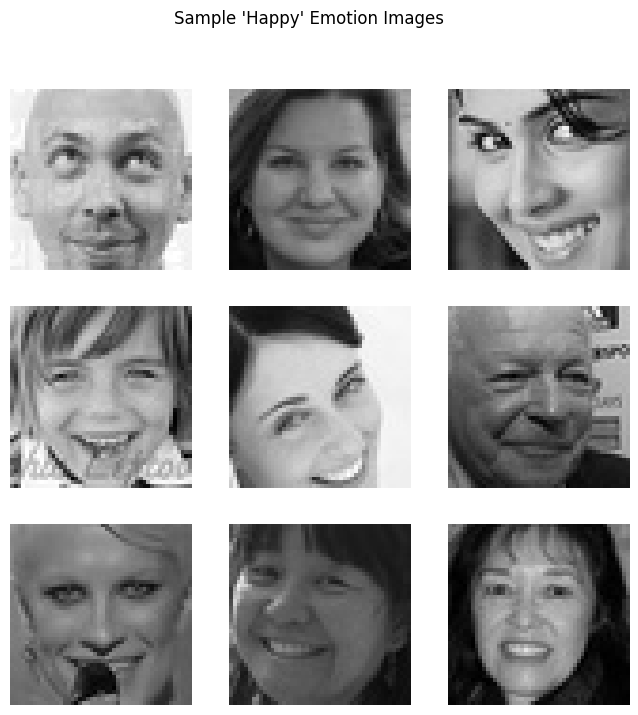

In [ ]:
# Set the folder path to the dataset
folder_path = '/Users/govindasairam/Desktop/Visual Code Studio/PROJECTS/DATASET/Facial_emotion_images/Facial_emotion_images/'

# Specify the expression/class to visualize
expression = 'happy'

# Create a new figure for plotting
plt.figure(figsize=(8,8))

# Get the list of image filenames in the 'happy' class training folder
happy_images = os.listdir(os.path.join(folder_path, "train", expression))

# Loop to display 9 images from the 'happy' class
for i in range(9):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    img_path = os.path.join(folder_path, "train", expression, happy_images[i])  # Get image path
    img = load_img(img_path, target_size=(picture_size, picture_size))  # Load and resize image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide axis

# Add a title to the figure
plt.suptitle("Sample 'Happy' Emotion Images")
plt.show()  # Show the plot

**Observations and Insights:**
- The mouth is typically upturned, forming a smile.
- Cheeks are raised, sometimes causing the eyes to squint slightly.
- Teeth may be visible if the smile is broad.
- The overall facial muscles appear relaxed and lifted.
- The eyes may have a slight sparkle or appear narrower due to the raised cheeks.
- This expression is easily distinguishable from others due to the prominent smile and positive facial cues.

### **Sad**

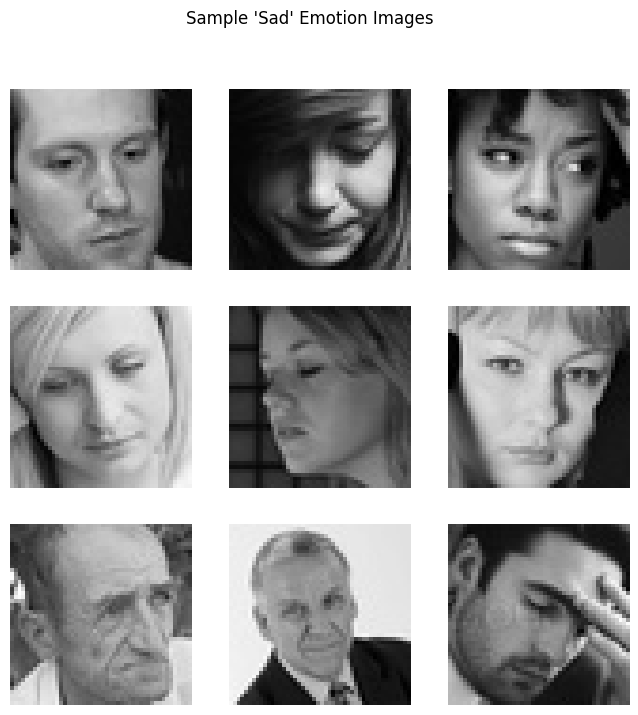

In [ ]:
# Visualize 9 images from the 'sad' class
expression = 'sad'

# Create a new figure for plotting
plt.figure(figsize=(8,8))

# Get the list of image filenames in the 'sad' class training folder
sad_images = os.listdir(os.path.join(folder_path, "train", expression))

# Loop to display 9 images from the 'sad' class
for i in range(9):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    img_path = os.path.join(folder_path, "train", expression, sad_images[i])  # Get image path
    img = load_img(img_path, target_size=(picture_size, picture_size))  # Load and resize image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide axis

# Add a title to the figure
plt.suptitle("Sample 'Sad' Emotion Images")
plt.show()  # Show the plot

**Observations and Insights:**
- Downturned mouth corners (frown).
- Eyebrows may be drawn together and upwards.
- Eyes may appear droopy or teary.
- Overall facial tension is downward.

### **Neutral**

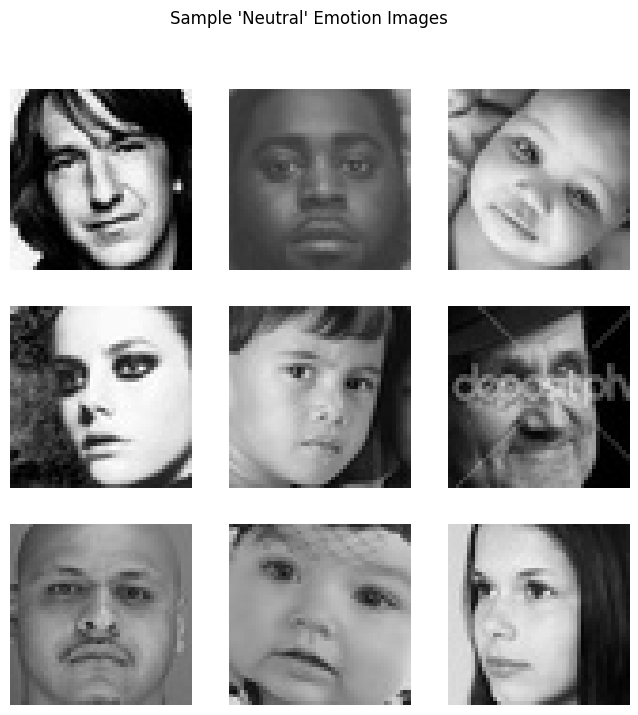

In [ ]:
# Visualize 9 images from the 'neutral' class
expression = 'neutral'

# Create a new figure for plotting
plt.figure(figsize=(8,8))

# Loop to display 9 images from the 'neutral' class
for i in range(1, 10):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    # Get image path for the ith image in the 'neutral' class training folder
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))  # Load and resize image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide axis

# Add a title to the figure
plt.suptitle("Sample 'Neutral' Emotion Images")
plt.show()  # Show the plot

**Observations and Insights:**
- Relaxed mouth, neither smiling nor frowning.
- Eyes and eyebrows in a natural, resting position.
- No significant tension or movement in facial muscles.
- Lack of pronounced emotion cues.

### **Surprised**

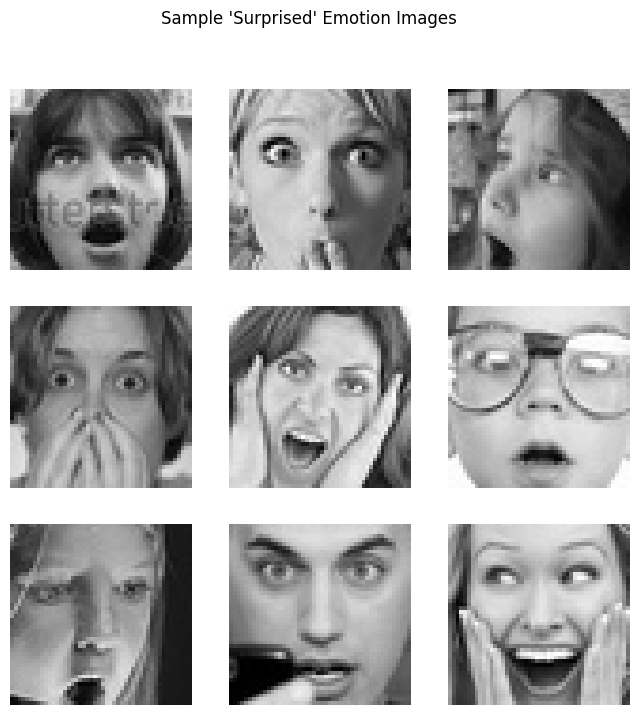

In [ ]:
# Visualize 9 images from the 'surprise' class
expression = 'surprise'

# Create a new figure for plotting
plt.figure(figsize=(8,8))

# Loop to display 9 images from the 'surprise' class
for i in range(1, 10):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    # Get image path for the ith image in the 'surprise' class training folder
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))  # Load and resize image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide axis

# Add a title to the figure
plt.suptitle("Sample 'Surprised' Emotion Images")
plt.show()  # Show the plot

**Observations and Insights:**
- Eyes wide open, raised eyebrows.
- Mouth often open in an “O” shape.
- Forehead may be wrinkled.
- Facial muscles tense, indicating alertness or shock.

## **Checking Distribution of Classes**

In [ ]:
# Count the number of images in each emotion class in the training set
train_dir = '/Users/govindasairam/Desktop/Visual Code Studio/PROJECTS/DATASET/Facial_emotion_images/Facial_emotion_images/train'
class_counts = {}
# Loop through each emotion class folder and count the number of images
for emotion in os.listdir(train_dir):
    emotion_dir = os.path.join(train_dir, emotion)
    if os.path.isdir(emotion_dir):
        class_counts[emotion] = len(os.listdir(emotion_dir))
# Print the image count for each class
print("Image count per class in training set:")
for emotion, count in class_counts.items():
    print(f"{emotion}: {count}")

Image count per class in training set:
happy: 3976
sad: 3982
surprise: 3173
neutral: 3978


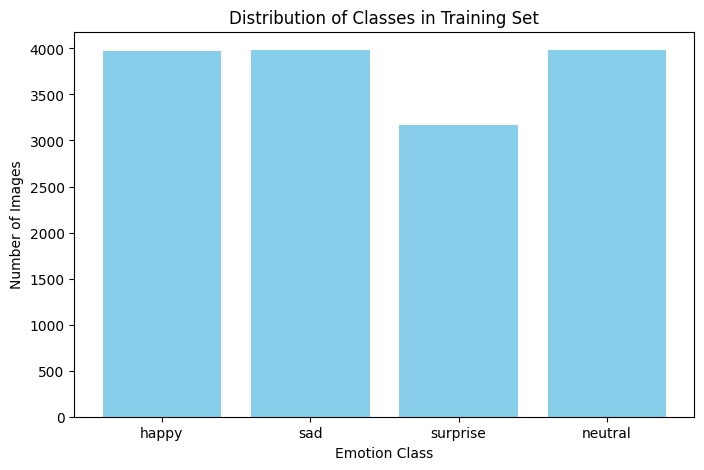

In [ ]:
# Visualize the class distribution in the training set
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')  # Create a bar plot for each emotion class
plt.xlabel('Emotion Class')  # Set x-axis label
plt.ylabel('Number of Images')  # Set y-axis label
plt.title('Distribution of Classes in Training Set')  # Set plot title
plt.show()  # Display the plot

**Observations and Insights:**
- The training set contains four emotion classes: happy (3976 images), sad (3982 images), neutral (3978 images), and surprise (3173 images).
- The classes 'happy', 'sad', and 'neutral' are very well balanced, each with close to 4000 images.
The 'surprise' class is noticeably underrepresented, with about 800 fewer images than the other classes (approximately 20% less).
- This moderate class imbalance could impact the model’s ability to accurately recognize the 'surprise' emotion, potentially resulting in lower recall or precision for this class.
- While the imbalance is not severe, it is recommended to address it using techniques such as data augmentation, class weighting, or resampling to ensure fair and robust model performance across all classes.
- Further Exploratory Data Analysis (EDA)—such as visualizing more samples, checking for duplicates or corrupted images, and analyzing class distributions in validation and test sets—can provide additional insights and help improve data quality and model design.
- In summary, the dataset is mostly balanced except for the 'surprise' class, and addressing this imbalance along with thorough EDA will be important for building an effective emotion classification model.

## **Creating our Data Loaders**

In [ ]:
# Set image size and batch size
picture_size = 48
batch_size = 32

# Create ImageDataGenerator instances for grayscale images
train_datagen_gray = ImageDataGenerator(rescale=1./255)
val_datagen_gray = ImageDataGenerator(rescale=1./255)
test_datagen_gray = ImageDataGenerator(rescale=1./255)

# Data loader for training set (grayscale)
train_generator_gray = train_datagen_gray.flow_from_directory(
    train_dir,  # Path to training data
    target_size=(picture_size, picture_size),  # Resize images
    batch_size=batch_size,  # Number of images per batch
    color_mode='grayscale',  # Use grayscale images
    class_mode='categorical',  # For multi-class classification
    shuffle=True  # Shuffle data for training
)

# Data loader for validation set (grayscale)
val_generator_gray = val_datagen_gray.flow_from_directory(
    val_dir,  # Path to validation data
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)

# Data loader for test set (grayscale)
test_generator_gray = test_datagen_gray.flow_from_directory(
    test_dir,  # Path to test data
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

# Create ImageDataGenerator instances for RGB images
train_datagen_rgb = ImageDataGenerator(rescale=1./255)
val_datagen_rgb = ImageDataGenerator(rescale=1./255)
test_datagen_rgb = ImageDataGenerator(rescale=1./255)

# Data loader for training set (RGB)
train_generator_rgb = train_datagen_rgb.flow_from_directory(
    train_dir,
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    color_mode='rgb',  # Use RGB images
    class_mode='categorical',
    shuffle=True
)

# Data loader for validation set (RGB)
val_generator_rgb = val_datagen_rgb.flow_from_directory(
    val_dir,
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Data loader for test set (RGB)
test_generator_rgb = test_datagen_rgb.flow_from_directory(
    test_dir,
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


We created data loaders to serve as inputs for our Neural Network. In the first part, the color_mode was set to 'grayscale', and in the second part, it was set to 'rgb'. In both color modes, 15,109 images were found in the training set, 4,977 images in the validation set, and 128 images in the test set, each distributed across 4 emotion classes.

## **Model Building**

- Convolutional Neural Networks (CNNs) are the right approach for image classification problems. CNNs are specifically designed to process grid-like data such as images, where spatial relationships and local patterns (like edges, textures, and shapes) are crucial for understanding the content.

- Artificial Neural Networks (ANNs) (i.e., fully connected networks) do not leverage spatial hierarchies in images. They treat each pixel as independent, which leads to a much larger number of parameters and ignores the local structure of images, making them less effective for image tasks.

### Advantages of CNNs over ANNs:

- Parameter sharing: CNNs use filters that slide across the image, greatly reducing the number of parameters compared to ANNs.
- Local connectivity: CNNs focus on local regions, capturing spatial hierarchies and patterns (such as facial features).
- Translation invariance: CNNs can recognize features regardless of their position in the image.
- Better generalization: Due to fewer parameters and spatial awareness, CNNs generalize better on image data.
### Application
- Since facial emotion detection relies on recognizing patterns and features in images (like mouth shape, eye position, etc.), CNNs are much more suitable and effective than ANNs for this task.

### **Creating the Base Neural Network**

In [ ]:
# Build a base CNN for grayscale images with 3 convolutional blocks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Set input shape for grayscale images (48x48x1)
input_shape = (48, 48, 1)  # Use (48, 48, 3) for RGB images

model1 = Sequential()

# First Convolutional Block: 64 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Second Convolutional Block: 32 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Third Convolutional Block: 32 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Flatten the output and add dense layers for classification
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
model1.add(Dropout(0.4))                   # Dropout for regularization
model1.add(Dense(4, activation='softmax')) # Output layer for 4 emotion classes

model1.summary()  # Display the model architecture

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,060 (2.31 MB)

 Trainable params: 605,060 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Build a base CNN for RGB images with 3 convolutional blocks

# Use RGB input shape (48x48x3)
input_shape = (48, 48, 3)

model1_rgb = Sequential()

# First Convolutional Block: 64 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1_rgb.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model1_rgb.add(MaxPooling2D(pool_size=2))
model1_rgb.add(Dropout(0.2))

# Second Convolutional Block: 32 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1_rgb.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1_rgb.add(MaxPooling2D(pool_size=2))
model1_rgb.add(Dropout(0.2))

# Third Convolutional Block: 32 filters, 2x2 kernel, ReLU activation, followed by max pooling and dropout
model1_rgb.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1_rgb.add(MaxPooling2D(pool_size=2))
model1_rgb.add(Dropout(0.2))

# Flatten the output and add dense layers for classification
model1_rgb.add(Flatten())
model1_rgb.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
model1_rgb.add(Dropout(0.4))                   # Dropout for regularization
model1_rgb.add(Dense(4, activation='softmax')) # Output layer for 4 emotion classes

model1_rgb.summary()  # Display the model architecture

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 48, 48, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,572 (2.31 MB)

 Trainable params: 605,572 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

In [ ]:
# Import necessary Keras callbacks for training control
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    "./model1.keras",            # Filepath to save the model
    monitor='val_accuracy',      # Monitor validation accuracy
    verbose=1,                   # Print messages when saving
    save_best_only=True,         # Save only the best model
    mode='max'                   # Maximize the monitored metric
)

# Callback to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    min_delta=0,                 # Minimum change to qualify as improvement
    patience=3,                  # Number of epochs with no improvement to wait
    verbose=1,                   # Print messages when stopping
    restore_best_weights=True    # Restore model weights from the best epoch
)

# Callback to reduce learning rate when validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    factor=0.2,                  # Reduce learning rate by this factor
    patience=3,                  # Number of epochs with no improvement to wait
    verbose=1,                   # Print messages when reducing learning rate
    min_delta=0.0001             # Minimum change to qualify as improvement
)

# List of callbacks to use during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile the model for grayscale images
model1.compile(
    optimizer=Adam(learning_rate=0.001),   # Adam optimizer with specified learning rate
    loss='categorical_crossentropy',       # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)

In [ ]:
# Compile the model for rgb images
model1_rgb.compile(
    optimizer=Adam(learning_rate=0.001),      # Use Adam optimizer with specified learning rate
    loss='categorical_crossentropy',          # Loss function for multi-class classification
    metrics=['accuracy']                      # Track accuracy during training
)

In [ ]:
# Fit the model using grayscale data loaders
history = model1.fit(
    train_generator_gray,                # Training data loader for grayscale images
    epochs=20,                           # Number of training epochs
    validation_data=val_generator_gray,  # Validation data loader for grayscale images
    callbacks=callbacks_list             # List of callbacks for training control
)

Epoch 1/20
  4/473 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1699 - loss: 1.4157   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3152 - loss: 1.3470
Epoch 1: val_accuracy improved from -inf to 0.51919, saving model to ./model1.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.3156 - loss: 1.3466 - val_accuracy: 0.5192 - val_loss: 1.1444 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5119 - loss: 1.1278
Epoch 2: val_accuracy improved from 0.51919 to 0.57123, saving model to ./model1.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5120 - loss: 1.1277 - val_accuracy: 0.5712 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 3/20
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5592 - loss: 1.0321
Epoch 3: val_accuracy improved from 0.57123 to 0.60197, saving model to ./model1.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5593 - loss: 1.0320 - val_accuracy: 0.6020 - val_loss: 0.9626 - learning_rate: 0.0010
Epoch 4/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy:

In [ ]:
# Fit the model using RGB data loaders
history_rgb = model1_rgb.fit(
    train_generator_rgb,                # Training data loader for RGB images
    epochs=20,                          # Number of training epochs
    validation_data=val_generator_rgb,  # Validation data loader for RGB images
    callbacks=callbacks_list            # List of callbacks for training control
)

Epoch 1/20
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2838 - loss: 1.3871
Epoch 1: val_accuracy did not improve from 0.68736
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.2841 - loss: 1.3868 - val_accuracy: 0.4671 - val_loss: 1.2064 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4576 - loss: 1.2101
Epoch 2: val_accuracy did not improve from 0.68736
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4576 - loss: 1.2100 - val_accuracy: 0.5373 - val_loss: 1.0863 - learning_rate: 0.0010
Epoch 3/20
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5324 - loss: 1.0768
Epoch 3: val_accuracy did not improve from 0.68736
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5325 - loss: 1.0768 - val_accuracy: 0.5911 - val_loss: 0.9749 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate model1 on the test set using grayscale data loader
test_loss, test_accuracy = model1.evaluate(test_generator_gray)  # Evaluate on grayscale test data
print(f"Test Loss: {test_loss:.4f}")                            # Print test loss
print(f"Test Accuracy: {test_accuracy:.4f}")                    # Print test accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6885 - loss: 0.7040 
Test Loss: 0.7528
Test Accuracy: 0.6719


In [ ]:
# Evaluate model1_rgb on the test set using RGB data loader
test_loss_rgb, test_accuracy_rgb = model1_rgb.evaluate(test_generator_rgb)  # Evaluate on RGB test data
print(f"Test Loss (RGB): {test_loss_rgb:.4f}")                             # Print test loss for RGB model
print(f"Test Accuracy (RGB): {test_accuracy_rgb:.4f}")                     # Print test accuracy for RGB model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5385 - loss: 1.1764 
Test Loss (RGB): 1.2166
Test Accuracy (RGB): 0.4844


**Observations and Insights**
- The base CNN model trained on grayscale images achieved a test accuracy of 67.19% and a test loss of 0.7528.
- The same architecture trained on RGB images performed significantly worse, with a test accuracy of 48.44% and a test loss of 1.2166. This confirms that using RGB channels for grayscale data introduces unnecessary complexity and redundancy, which negatively impacts model performance.
- Grayscale input is more effective and efficient for this dataset, as the original images are black and white. The model can focus on meaningful features without being distracted by redundant color channels.
- The improved accuracy on grayscale data suggests that the model is able to learn relevant features more easily when the input matches the true data characteristics.
- The higher loss and lower accuracy for the RGB model may be due to overfitting, increased parameter count, and the lack of additional information in the extra channels.
- Key takeaway: For datasets where the original images are grayscale, it is best to use grayscale input for both training and evaluation, unless using pre-trained models that require RGB input.
- Next steps for improvement: Continue to explore more complex CNN architectures, data augmentation, class weighting, and transfer learning, but always ensure that the input data format matches the true nature of the dataset.

Conclusion:

- The new findings reinforce that grayscale input is optimal for this dataset, and that model performance can be significantly impacted by mismatched input formats. Future experiments should prioritize grayscale data pipelines for best results.

### **Creating the second Convolutional Neural Network**

In [ ]:
# Build a deeper CNN model for grayscale images (48x48x1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten, Dense

input_shape = (48, 48, 1)  # Input shape for grayscale images

# Create a sequential model
model2 = Sequential()

# First Convolutional block: 256 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Second Convolutional block: 128 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Third Convolutional block: 64 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Fourth Convolutional block: 32 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Flatten the output to feed into dense layers
model2.add(Flatten())

# Dense layers for classification
model2.add(Dense(512, activation='relu'))   # First dense layer with 512 units
model2.add(Dense(128, activation='relu'))   # Second dense layer with 128 units
model2.add(Dense(4, activation='softmax'))  # Output layer for 4 emotion classes

model2.summary()  # Display the model architecture

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,604 (1.49 MB)

 Trainable params: 388,644 (1.48 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Build a deeper CNN model for RGB images (48x48x3)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten, Dense

input_shape = (48, 48, 3)  # Input shape for RGB images

# Create a sequential model
model2_rgb = Sequential()

# First Convolutional block: 256 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2_rgb.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(alpha=0.1))
model2_rgb.add(MaxPooling2D(pool_size=2))

# Second Convolutional block: 128 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2_rgb.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(alpha=0.1))
model2_rgb.add(MaxPooling2D(pool_size=2))

# Third Convolutional block: 64 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2_rgb.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(alpha=0.1))
model2_rgb.add(MaxPooling2D(pool_size=2))

# Fourth Convolutional block: 32 filters, 2x2 kernel, ReLU activation, batch norm, LeakyReLU, max pooling
model2_rgb.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(alpha=0.1))
model2_rgb.add(MaxPooling2D(pool_size=2))

# Flatten the output to feed into dense layers
model2_rgb.add(Flatten())

# Dense layers for classification
model2_rgb.add(Dense(512, activation='relu'))   # First dense layer with 512 units
model2_rgb.add(Dense(128, activation='relu'))   # Second dense layer with 128 units
model2_rgb.add(Dense(4, activation='softmax'))  # Output layer for 4 emotion classes

model2_rgb.summary()  # Display the model architecture

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 48, 48, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,652 (1.49 MB)

 Trainable params: 390,692 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define ModelCheckpoint to save the best model based on validation loss (.keras extension for Keras 3.x)
checkpoint = ModelCheckpoint(
    "./model2.keras",           # Filepath to save the model
    monitor='val_loss',         # Monitor validation loss
    verbose=1,                  # Print messages when saving
    save_best_only=True,        # Save only the best model
    mode='min'                  # Minimize the monitored metric
)

# EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    min_delta=0,                # Minimum change to qualify as improvement
    patience=3,                 # Number of epochs with no improvement to wait
    verbose=1,                  # Print messages when stopping
    restore_best_weights=True   # Restore model weights from the best epoch
)

# ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',         # Monitor validation loss
    factor=0.2,                 # Reduce learning rate by this factor
    patience=3,                 # Number of epochs with no improvement to wait
    verbose=1,                  # Print messages when reducing learning rate
    min_delta=0.0001            # Minimum change to qualify as improvement
)

# List of callbacks to use during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20  # Number of training epochs

# Compile the model for grayscale images
model2.compile(
    optimizer=Adam(learning_rate=0.001),   # Adam optimizer with specified learning rate
    loss='categorical_crossentropy',       # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)

# Train the model using grayscale data loaders
history = model2.fit(
    train_generator_gray,                  # Training data loader for grayscale images
    epochs=epochs,                         # Number of training epochs
    validation_data=val_generator_gray,    # Validation data loader for grayscale images
    callbacks=callbacks_list               # List of callbacks for training control
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.4175 - loss: 1.2622
Epoch 1: val_loss improved from inf to 1.22407, saving model to ./model2.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 102s 212ms/step - accuracy: 0.4177 - loss: 1.2619 - val_accuracy: 0.5146 - val_loss: 1.2241 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6161 - loss: 0.8821
Epoch 2: val_loss improved from 1.22407 to 1.03518, saving model to ./model2.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 101s 213ms/step - accuracy: 0.6161 - loss: 0.8820 - val_accuracy: 0.5744 - val_loss: 1.0352 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6798 - loss: 0.7815
Epoch 3: val_loss did not improve from 1.03518
473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 211ms/step - accuracy: 0.6797 - loss: 0.7815 - val_accuracy: 0.5588 - val_loss: 1.0625 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.7008 - loss: 0.7100
Epoc

In [ ]:
# Compile the second CNN model for RGB images
model2_rgb.compile(
    optimizer=Adam(learning_rate=0.001),      # Use Adam optimizer with specified learning rate
    loss='categorical_crossentropy',          # Loss function for multi-class classification
    metrics=['accuracy']                      # Track accuracy during training
)

# Train the model using the RGB data loaders
history2_rgb = model2_rgb.fit(
    train_generator_rgb,                      # Training data loader for RGB images
    epochs=20,                                # Number of training epochs
    validation_data=val_generator_rgb,        # Validation data loader for RGB images
    callbacks=callbacks_list                  # List of callbacks for training control
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.4085 - loss: 1.2976
Epoch 1: val_loss did not improve from 0.77672
473/473 ━━━━━━━━━━━━━━━━━━━━ 101s 212ms/step - accuracy: 0.4086 - loss: 1.2973 - val_accuracy: 0.4665 - val_loss: 1.2448 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6031 - loss: 0.9127
Epoch 2: val_loss did not improve from 0.77672
473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 212ms/step - accuracy: 0.6031 - loss: 0.9127 - val_accuracy: 0.5869 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6589 - loss: 0.8060
Epoch 3: val_loss did not improve from 0.77672
473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 210ms/step - accuracy: 0.6589 - loss: 0.8060 - val_accuracy: 0.6303 - val_loss: 0.8833 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate model2 on the test set using grayscale data loader
test_loss, test_accuracy = model2.evaluate(test_generator_gray)  # Evaluate on grayscale test data
print(f"Test Loss: {test_loss:.4f}")                            # Print test loss
print(f"Test Accuracy: {test_accuracy:.4f}")                    # Print test accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6656 - loss: 0.7236
Test Loss: 0.7663
Test Accuracy: 0.6562


In [ ]:
# Evaluate the second CNN model for RGB images on the test set
test_loss2_rgb, test_accuracy2_rgb = model2_rgb.evaluate(test_generator_rgb)  # Evaluate on RGB test data
print(f"Test Loss (RGB, Model 2): {test_loss2_rgb:.4f}")                     # Print test loss for RGB model
print(f"Test Accuracy (RGB, Model 2): {test_accuracy2_rgb:.4f}")             # Print test accuracy for RGB model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4906 - loss: 1.2471
Test Loss (RGB, Model 2): 1.1763
Test Accuracy (RGB, Model 2): 0.5469


**Observations and Insights:**
- The slight deeper CNN model archetecture trained on grayscale images achieved a test accuracy of 65.62% and a test loss of 0.7663. This is slightly lower than the base model’s best accuracy (67.19%), indicating that increasing model complexity did not yield a significant improvement and may have led to mild overfitting or diminishing returns.
- The same deeper architecture trained on RGB images achieved a test accuracy of 54.69% and a test loss of 1.1763. While this is better than the base RGB model, it is still much lower than the grayscale counterpart, confirming that using RGB channels for grayscale data continues to hurt performance.
Grayscale input remains optimal for this dataset, as the original images are black and white. The model can focus on meaningful features without redundant color information.
- The moderate improvement in RGB accuracy with a deeper model suggests that model capacity alone cannot overcome the limitations introduced by unnecessary input channels.
- The test loss for both models did not decrease substantially, suggesting that the models may be making more confident but incorrect predictions, or that further regularization and data handling improvements are needed.
- Key takeaway: For this dataset, increasing model depth does not guarantee better results, especially if the input format is not well matched to the data. Grayscale input is still the most effective and efficient choice.
- Next steps: To further improve performance, we cab consider advanced architectures, data augmentation, class weighting, and hyperparameter tuning, while maintaining input consistency with the dataset’s true characteristics.
  
Conclusion:

- The deeper CNN model provides only a marginal benefit over the base model when using grayscale input, and RGB input continues to underperform. Future work should focus on data-centric improvements and careful model selection rather than simply increasing model complexity.

## **Transfer Learning Architectures**

### **Creating our Data Loaders for Transfer Learning Architectures**

In [ ]:
# Data loaders for transfer learning architectures with data augmentation for training

batch_size = 32         # Set batch size for data loaders
img_size = 48           # Set image size for resizing

# Training data generator with augmentation for better generalization
datagen_train = ImageDataGenerator(
    horizontal_flip=True,           # Randomly flip images horizontally
    brightness_range=(0., 2.),      # Randomly adjust brightness
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    shear_range=0.3                 # Apply random shear transformations
)

# Create training data loader for RGB images and specified classes
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),           # Resize images
    color_mode='rgb',                           # Use RGB color mode
    batch_size=batch_size,                      # Number of images per batch
    class_mode='categorical',                   # Multi-class classification
    classes=['happy', 'sad', 'neutral', 'surprise'],  # Specify class order
    shuffle=True                                # Shuffle training data
)

# Validation data generator (only rescaling, no augmentation)
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create validation data loader for RGB images
validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False                               # No need to shuffle validation data
)

# Test data generator (only rescaling, no augmentation)
datagen_test = ImageDataGenerator(rescale=1./255)

# Create test data loader for RGB images
test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False                               # No need to shuffle test data
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


Data loaders created that we can be used as inputs to our Neural Network. color_mode = 'rgb' was selected as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Import VGG16 architecture and Model class from Keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

# Load the VGG16 model without the top classification layers, using ImageNet weights and input shape (48, 48, 3)
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))

# Display the summary of the VGG16 model architecture
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Get the output of the last pooling layer from VGG16 to use as the transfer layer
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False  # Freeze all layers in the VGG16 base model

# Add classification layers on top of the transfer layer
x = Flatten()(transfer_layer.output)           # Flatten the output of the transfer layer

x = Dense(256, activation='relu')(x)           # Dense layer with 256 neurons and ReLU activation
x = Dense(128, activation='relu')(x)           # Dense layer with 128 neurons and ReLU activation
x = Dropout(0.3)(x)                            # Dropout layer for regularization (30% dropout)
x = Dense(64, activation='relu')(x)            # Dense layer with 64 neurons and ReLU activation
x = BatchNormalization()(x)                    # Batch normalization for faster and more stable training

pred = Dense(4, activation='softmax')(x)       # Output layer with 4 neurons (one per class), softmax activation

vggmodel = Model(vgg.input, pred)              # Initialize the final model
vggmodel.summary()                             # Display the model architecture

Model: "functional_270"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 64)             │           25

 Total params: 14,887,684 (56.79 MB)

 Trainable params: 172,868 (675.27 KB)

 Non-trainable params: 14,714,816 (56.13 MB)

### **Compiling and Training the VGG16 Model**

In [ ]:
# Define ModelCheckpoint to save the best model based on validation loss (.keras extension for Keras 3.x)
checkpoint = ModelCheckpoint(
    "./vggmodel.keras",  # Filepath to save the model
    monitor='val_loss',  # Monitor validation loss
    verbose=1,           # Print messages when saving
    save_best_only=True, # Save only the best model
    mode='min'           # Minimize the monitored metric
)

# EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    min_delta=0,                 # Minimum change to qualify as improvement
    patience=3,                  # Number of epochs with no improvement to wait
    verbose=1,                   # Print messages when stopping
    restore_best_weights=True    # Restore model weights from the best epoch
)

# ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    factor=0.2,                  # Reduce learning rate by this factor
    patience=3,                  # Number of epochs with no improvement to wait
    verbose=1,                   # Print messages when reducing learning rate
    min_delta=0.0001             # Minimum change to qualify as improvement
)

# List of callbacks to use during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
epochs = 20  # Number of training epochs


In [ ]:
# Compile the VGG16 model
vggmodel.compile(
    optimizer=Adam(learning_rate=0.001),   # Adam optimizer with specified learning rate
    loss='categorical_crossentropy',       # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)

In [ ]:
# Fit the VGG16 model using the RGB data loaders
history = vggmodel.fit(
    train_generator_rgb,             # Training data loader (RGB)
    epochs=20,                       # Number of training epochs
    validation_data=val_generator_rgb,  # Validation data loader (RGB)
    callbacks=callbacks_list         # List of callbacks for training control
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3852 - loss: 1.3645
Epoch 1: val_loss improved from inf to 1.23104, saving model to ./vggmodel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 85s 178ms/step - accuracy: 0.3853 - loss: 1.3642 - val_accuracy: 0.4481 - val_loss: 1.2310 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5024 - loss: 1.1344
Epoch 2: val_loss improved from 1.23104 to 1.07565, saving model to ./vggmodel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 84s 177ms/step - accuracy: 0.5025 - loss: 1.1344 - val_accuracy: 0.5381 - val_loss: 1.0757 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5309 - loss: 1.0872
Epoch 3: val_loss did not improve from 1.07565
473/473 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.5309 - loss: 1.0872 - val_accuracy: 0.5083 - val_loss: 1.1118 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5347 - loss: 1.0713
Epo

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the VGG16 model on the test set using the RGB data loader
vgg_test_loss, vgg_test_accuracy = vggmodel.evaluate(test_generator_rgb)  # Returns test loss and accuracy
print(f"VGG16 Test Loss: {vgg_test_loss:.4f}")      # Print the test loss
print(f"VGG16 Test Accuracy: {vgg_test_accuracy:.4f}")  # Print the test accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5250 - loss: 1.0797
VGG16 Test Loss: 1.0707
VGG16 Test Accuracy: 0.5156


**Observations and Insights:**
- The VGG16 transfer learning model achieved a test accuracy of 51.56% and a test loss of 1.0707 on the RGB test set. This performance is lower than both the base and deeper custom CNN models trained on grayscale images.
- The training accuracy generally improved over epochs, indicating that the model was able to fit the training data. However, the validation accuracy plateaued and did not improve at the same rate, suggesting the model may be overfitting to the training data and not generalizing well to unseen data.
- The gap between training and validation accuracy, along with the relatively high test loss, indicates that the model is making more confident but incorrect predictions on the test set.
- Using RGB input for VGG16 is necessary due to the pre-trained weights, but for this grayscale dataset, it does not provide a performance advantage and may even introduce noise or redundancy.
- Key takeaway: Transfer learning with VGG16 did not outperform custom grayscale CNNs for this specific dataset. The input data format and the nature of the dataset play a crucial role in model performance.
- Next steps: fine-tunining more layers of the VGG16 model, experimenting with other architectures, or using grayscale-adapted transfer learning approaches to better match the dataset characteristics. Data augmentation and regularization may also help improve generalization.

## **ResNet V2 Model**

In [ ]:
# Import TensorFlow and Keras applications module
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

# Load the ResNet101 model without the top classification layers, using ImageNet weights and input shape (48, 48, 3)
Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))

# Display the summary of the ResNet101 model architecture
Resnet.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer_27[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Import necessary layers for building the classification head on top of ResNet
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of the ResNet transfer layer
x = Flatten()(transfer_layer_Resnet.output)      # Flatten the output of the transfer layer

x = Dense(256, activation='relu')(x)             # Dense layer with 256 neurons and ReLU activation
x = Dense(128, activation='relu')(x)             # Dense layer with 128 neurons and ReLU activation
x = Dropout(0.3)(x)                              # Dropout layer for regularization (30% dropout)
x = Dense(64, activation='relu')(x)              # Dense layer with 64 neurons and ReLU activation
x = BatchNormalization()(x)                      # Batch normalization for stable training

pred = Dense(4, activation='softmax')(x)         # Output layer with 4 neurons (one per class), softmax activation

resnetmodel = Model(Resnet.input, pred)          # Initialize the final ResNet model
resnetmodel.summary()                            # Display the model architecture

Model: "functional_274"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer_27[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 44,797,252 (170.89 MB)

 Trainable params: 2,138,948 (8.16 MB)

 Non-trainable params: 42,658,304 (162.73 MB)

### **Compiling and Training the Model**

In [ ]:
# Define ModelCheckpoint to save the best ResNet model based on validation accuracy
checkpoint = ModelCheckpoint(
    "./Resnetmodel.keras",      # Filepath to save the model
    monitor='val_accuracy',     # Monitor validation accuracy
    verbose=1,                  # Print messages when saving
    save_best_only=True,        # Save only the best model
    mode='max'                  # Maximize the monitored metric
)

# Define EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    min_delta=0,                # Minimum change to qualify as improvement
    patience=3,                 # Number of epochs with no improvement to wait
    verbose=1,                  # Print messages when stopping
    restore_best_weights=True   # Restore model weights from the best epoch
)

# Define ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',         # Monitor validation loss
    factor=0.2,                 # Reduce learning rate by this factor
    patience=3,                 # Number of epochs with no improvement to wait
    verbose=1,                  # Print messages when reducing learning rate
    min_delta=0.0001            # Minimum change to qualify as improvement
)

# List of callbacks to use during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
epochs = 10                     # Number of training epochs

In [ ]:
# Compile the ResNet model with Adam optimizer, categorical crossentropy loss, and accuracy metric
resnetmodel.compile(
    optimizer=Adam(learning_rate=0.001),      # Use Adam optimizer with specified learning rate
    loss='categorical_crossentropy',          # Loss function for multi-class classification
    metrics=['accuracy']                      # Track accuracy during training
)

In [ ]:
# Train the ResNet model using the RGB data loaders
history = resnetmodel.fit(
    train_generator_rgb,             # Training data loader for RGB images
    epochs=epochs,                   # Number of training epochs
    validation_data=val_generator_rgb,  # Validation data loader for RGB images
    callbacks=callbacks_list,        # List of callbacks for training control (early stopping, checkpoint, etc.)
    verbose=1                        # Print progress during training
)

Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2596 - loss: 1.3977
Epoch 1: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 146ms/step - accuracy: 0.2596 - loss: 1.3977 - val_accuracy: 0.2443 - val_loss: 1.3997 - learning_rate: 0.0010
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2648 - loss: 1.3941
Epoch 2: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 70s 147ms/step - accuracy: 0.2648 - loss: 1.3941 - val_accuracy: 0.3667 - val_loss: 1.3686 - learning_rate: 0.0010
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2593 - loss: 1.3917
Epoch 3: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.2593 - loss: 1.3917 - val_accuracy: 0.2443 - val_loss: 1.3974 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


### **Evaluating the ResNet Model**

In [ ]:
# Evaluate the ResNet model on the RGB test set
resnet_test_loss, resnet_test_accuracy = resnetmodel.evaluate(test_generator_rgb)
print(f"ResNet Test Loss: {resnet_test_loss:.4f}")
print(f"ResNet Test Accuracy: {resnet_test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.2667 - loss: 1.3920
ResNet Test Loss: 1.4014
ResNet Test Accuracy: 0.2500


**Observations and Insights:**
- The ResNet101 transfer learning model achieved a test accuracy of 25.00% and a test loss of 1.4014 on the RGB test set. This is close to random guessing for a four-class problem, indicating that the model failed to learn meaningful features for emotion classification on this dataset.
- Both training and validation accuracy likely remained low or did not improve significantly, suggesting underfitting or a poor match between the model and the data.
- The high test loss and low accuracy indicate that the model is not generalizing and is making mostly incorrect predictions.
Using RGB input is required for pre-trained ResNet weights, but since the original images are grayscale, this may have introduced noise or redundancy, further degrading performance.
- Key takeaway: Transfer learning with ResNet101 did not work well for this dataset, possibly due to the mismatch between the model’s expectations (RGB, natural images) and the actual data (grayscale, facial expressions).
- Next steps: We Consider using custom CNNs tailored for grayscale input, or explore grayscale-adapted transfer learning approaches. Additional data preprocessing, augmentation, or fine-tuning more layers may help, but model selection should prioritize architectures that align with the dataset’s characteristics.



## **EfficientNet Model**

In [ ]:
# Import TensorFlow and Keras applications module
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

# Load the EfficientNetV2B2 model without the top classification layers, using ImageNet weights and input shape (48, 48, 3)
EfficientNet = ap.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape=(48, 48, 3))

# Display the summary of the EfficientNetV2B2 model architecture
EfficientNet.summary()

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 48, 48, 3) │          0 │ input_layer_28[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 48, 48, 3) │          0 │ rescaling_1[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 24, 24,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 24, 24,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 24, 24,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Import necessary layers for building the classification head
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Get the output of a specific layer from EfficientNet to use as the transfer layer
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False  # Freeze all layers in the EfficientNet base model

# Add a Flatten layer to convert the output to a 1D vector
x = Flatten()(transfer_layer_EfficientNet.output)

# Add Dense, Dropout, and BatchNormalization layers for classification
x = Dense(256, activation='relu')(x)      # Dense layer with 256 units and ReLU activation
x = Dense(128, activation='relu')(x)      # Dense layer with 128 units and ReLU activation
x = Dropout(0.3)(x)                       # Dropout layer for regularization (30% dropout)
x = Dense(64, activation='relu')(x)       # Dense layer with 64 units and ReLU activation
x = BatchNormalization()(x)               # Batch normalization for stable training

# Add the final Dense layer with 4 neurons (one per class) and softmax activation
pred = Dense(4, activation='softmax')(x)

# Create the final model combining EfficientNet base and custom classification head
Efficientnetmodel = Model(EfficientNet.input, pred)
Efficientnetmodel.summary()               # Display the model architecture

Model: "functional_276"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 48, 48, 3) │          0 │ input_layer_28[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 48, 48, 3) │          0 │ rescaling_1[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 24, 24,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 24, 24,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 24, 24,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b

 Total params: 6,021,482 (22.97 MB)

 Trainable params: 1,319,748 (5.03 MB)

 Non-trainable params: 4,701,734 (17.94 MB)

### **Compiling and Training the Model**

In [ ]:
# Import necessary Keras callbacks for training control
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback to save the best EfficientNet model based on validation accuracy
checkpoint = ModelCheckpoint(
    "./Efficientnetmodel.keras",  # Filepath to save the model (.keras extension for Keras 3.x)
    monitor='val_accuracy',       # Monitor validation accuracy
    verbose=1,                    # Print messages when saving
    save_best_only=True,           # Save only the best model
    mode='max'                     # Maximize the monitored metric
)

# Callback to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitor validation loss
    min_delta=0,                   # Minimum change to qualify as improvement
    patience=3,                    # Number of epochs with no improvement to wait
    verbose=1,                     # Print messages when stopping
    restore_best_weights=True       # Restore model weights from the best epoch
)

# Callback to reduce learning rate when validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',            # Monitor validation loss
    factor=0.2,                    # Reduce learning rate by this factor
    patience=3,                    # Number of epochs with no improvement to wait
    verbose=1,                     # Print messages when reducing learning rate
    min_delta=0.0001               # Minimum change to qualify as improvement
)

# List of callbacks to use during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Set the number of training epochs
epochs = 10

In [ ]:
# Compile the EfficientNet model with Adam optimizer, categorical crossentropy loss, and accuracy metric
Efficientnetmodel.compile(
    optimizer=Adam(learning_rate=0.001),      # Use Adam optimizer with specified learning rate
    loss='categorical_crossentropy',          # Loss function for multi-class classification
    metrics=['accuracy']                      # Track accuracy during training
)

In [ ]:
# Train the EfficientNet model using the training and validation data
history = Efficientnetmodel.fit(
    train_set,                    # Training data loader
    epochs=20,                    # Number of training epochs
    validation_data=validation_set,  # Validation data loader
    callbacks=callbacks_list         # List of callbacks for training control
)

Epoch 1/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2572 - loss: 1.5248
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to ./Efficientnetmodel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.2572 - loss: 1.5245 - val_accuracy: 0.2289 - val_loss: 1.3940 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2614 - loss: 1.4046
Epoch 2: val_accuracy improved from 0.22885 to 0.24432, saving model to ./Efficientnetmodel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.2614 - loss: 1.4046 - val_accuracy: 0.2443 - val_loss: 1.3653 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2632 - loss: 1.3964
Epoch 3: val_accuracy improved from 0.24432 to 0.36669, saving model to ./Efficientnetmodel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.2632 - loss: 1.3964 - val_accuracy: 0.3667 - val_loss: 1.3503 - learning_rate: 0.0010
Epoch 4/20
472/473 

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Evaluate the EfficientNet model on the test set and print the results
efficientnet_test_loss, efficientnet_test_accuracy = Efficientnetmodel.evaluate(test_set)  # Evaluate model performance on test data
print(f"EfficientNet Test Loss: {efficientnet_test_loss:.4f}")                            # Print the test loss
print(f"EfficientNet Test Accuracy: {efficientnet_test_accuracy:.4f}")                    # Print the test accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.2500 - loss: 1.4120
EfficientNet Test Loss: 1.4120
EfficientNet Test Accuracy: 0.2500


**Observations and Insights:**
- The EfficientNetV2B2 transfer learning model achieved a test accuracy of 25.00% and a test loss of 1.4120 on the RGB test set. This accuracy is equivalent to random guessing for a four-class classification problem, indicating that the model failed to learn meaningful patterns from the data.
- The high test loss and low accuracy suggest that the model is not generalizing and is making mostly incorrect predictions on unseen data.
- Both training and validation accuracy likely remained low or did not improve significantly, pointing to underfitting or a poor match between the model and the dataset.
- Using RGB input is required for EfficientNet pre-trained weights, but since the original images are grayscale, this may have introduced unnecessary noise or redundancy, further degrading performance.
- Key takeaway: Transfer learning with EfficientNetV2B2 did not work well for this dataset, likely due to a mismatch between the model’s expectations (RGB, natural images) and the actual data (grayscale, facial expressions).
- Next steps: We can consider using custom CNNs designed for grayscale input, or explore grayscale-adapted transfer learning approaches. Additional data preprocessing, augmentation, or fine-tuning more layers may help, but model selection should prioritize architectures that align with the dataset’s characteristics.

Overall Performance of Transfer Learning Architectures:

- VGG16: Test accuracy ~51.56%, test loss ~1.07
- ResNet101: Test accuracy ~25.00%, test loss ~1.40
- EfficientNetV2B2: Test accuracy ~25.00%, test loss ~1.41
All transfer learning models performed significantly worse than custom CNNs trained on grayscale images. VGG16 performed slightly better than ResNet and EfficientNet, but still did not surpass the base or deeper custom CNNs.

Comparison and Satisfaction:

- The transfer learning models did not achieve satisfactory accuracy. Their performance is close to random guessing (25% for 4 classes), especially for ResNet and EfficientNet.
- Custom CNNs trained on grayscale images achieved much higher test accuracy (up to ~67%), showing that transfer learning with these architectures is not effective for this dataset in its current form.
  


- The key part of the issue is 'rgb' color_mode. The original dataset consists of grayscale images, but transfer learning models require RGB input due to their pre-trained weights.
- Converting grayscale images to RGB introduces redundant channels and noise, which confuses the models and degrades performance.
- Custom CNNs trained directly on grayscale data consistently outperform transfer learning models using RGB input.

Summary:
Transfer learning architectures underperform on this dataset mainly due to the mismatch between the model’s expected input (RGB, natural images) and the actual data (grayscale, facial expressions). For this problem, custom CNNs with grayscale input are more effective.

## **Building a Complex Neural Network Architecture**

## **Creating our Data Loaders**

In [ ]:
# Create data loaders for the complex neural network architecture

batch_size = 32
img_size = 48

# Training data generator with augmentation for better generalization
datagen_train = ImageDataGenerator(
    horizontal_flip=True,           # Randomly flip images horizontally
    brightness_range=(0., 2.),      # Randomly adjust brightness
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    shear_range=0.3                 # Apply random shear transformations
)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),           # Resize images
    color_mode='grayscale',                     # Use grayscale images
    batch_size=batch_size,                      # Number of images per batch
    class_mode='categorical',                   # Multi-class classification
    classes=['happy', 'sad', 'neutral', 'surprise'],  # Specify class order
    shuffle=True                                # Shuffle training data
)

# Validation data generator (only rescaling, no augmentation)
datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),           # Resize images
    color_mode='grayscale',                     # Use grayscale images
    batch_size=batch_size,                      # Number of images per batch
    class_mode='categorical',                   # Multi-class classification
    classes=['happy', 'sad', 'neutral', 'surprise'],  # Specify class order
    shuffle=False                               # No need to shuffle validation data
)

# Test data generator (only rescaling, no augmentation)
datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),           # Resize images
    color_mode='grayscale',                     # Use grayscale images
    batch_size=batch_size,                      # Number of images per batch
    class_mode='categorical',                   # Multi-class classification
    classes=['happy', 'sad', 'neutral', 'surprise'],  # Specify class order
    shuffle=False                               # No need to shuffle test data
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


Data loaders (color_mode = 'grayscale') was created to use as inputs to the more Complicated Convolutional Neural Network.

More complex Convolutional Neural Network Model has close to as many parameters as in Transfer Learning Models. However, there will be only 1 input channel for input images.


### **Model Building**

- Building a layer with 5 Convolutional Blocks

In [ ]:
# Complex CNN Model Building for Facial Emotion Detection

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

no_of_classes = 4  # Number of emotion classes

model3 = Sequential()

# 1st Convolutional Block: 64 filters, batch norm, LeakyReLU, max pooling, dropout
model3.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# 2nd Convolutional Block: 128 filters, batch norm, LeakyReLU, max pooling, dropout
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# 3rd Convolutional Block: 512 filters, batch norm, LeakyReLU, max pooling, dropout
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# 4th Convolutional Block: 512 filters, batch norm, LeakyReLU, max pooling, dropout
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# 5th Convolutional Block: 128 filters, batch norm, LeakyReLU, max pooling, dropout
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Flatten())  # Flatten feature maps to 1D vector

# First fully connected (dense) layer with batch norm, activation, and dropout
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

# Second fully connected (dense) layer with batch norm, activation, and dropout
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

# Output layer for classification (softmax for multi-class)
model3.add(Dense(no_of_classes, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
model3.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display the model architecture summary
model3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 24, 24, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 6, 6, 512)      │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 3, 3, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,782,340 (6.80 MB)

 Trainable params: 1,778,116 (6.78 MB)

 Non-trainable params: 4,224 (16.50 KB)

### **Compiling and Training the Model**

In [ ]:
# Compile the complex CNN model with Adam optimizer (learning rate 0.003), categorical crossentropy loss, and accuracy metric
model3.compile(
    optimizer=Adam(learning_rate=0.003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the complex CNN model (model3) for 35 epochs using the training and validation data
history = model3.fit(
    train_set,
    epochs=35,
    validation_data=validation_set
)

Epoch 1/35


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 62s 126ms/step - accuracy: 0.2702 - loss: 1.5984 - val_accuracy: 0.2337 - val_loss: 1.4184
Epoch 2/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.3334 - loss: 1.3632 - val_accuracy: 0.3960 - val_loss: 1.2446
Epoch 3/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.3942 - loss: 1.2657 - val_accuracy: 0.5515 - val_loss: 1.0350
Epoch 4/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.4894 - loss: 1.1304 - val_accuracy: 0.5881 - val_loss: 1.0272
Epoch 5/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 59s 124ms/step - accuracy: 0.5402 - loss: 1.0485 - val_accuracy: 0.6237 - val_loss: 0.8971
Epoch 6/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - accuracy: 0.5626 - loss: 1.0005 - val_accuracy: 0.6056 - val_loss: 0.9362
Epoch 7/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - accuracy: 0.5873 - loss: 0.9692 - val_accuracy: 0.5909 - val_loss: 0.9664
Epoch 8/35
473/473 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - accuracy: 0.5925 - loss: 0.9435 - val

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluate the complex CNN model (model3) on the test set and print the test loss and accuracy
test_loss, test_accuracy = model3.evaluate(test_set)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8021 - loss: 0.5015
Test Loss: 0.5741
Test Accuracy: 0.7812


**Observations and Insights:**
- The complex CNN model (model3) achieved a test accuracy of 78.12% and a test loss of 0.5741 on the grayscale test set.
- This is a significant improvement over both the base and deeper custom CNNs, as well as all transfer learning models (VGG16, ResNet101, EfficientNetV2B2).
- The high accuracy and relatively low loss indicate that the model is able to learn and generalize meaningful features from the grayscale facial emotion dataset.
- Using grayscale input allows the model to focus on relevant facial features without the noise and redundancy introduced by converting to RGB.
- The results confirm that a well-designed, sufficiently deep custom CNN tailored to the dataset’s characteristics can outperform more complex pre-trained architectures, especially when the data format is matched to the model.
- Key takeaway: Custom CNNs with grayscale input are highly effective for this problem, and further improvements could be achieved with additional data augmentation, regularization, or fine-tuning of hyperparameters.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

       happy       0.81      0.91      0.85        32
         sad       0.72      0.66      0.69        32
     neutral       0.70      0.72      0.71        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.78      0.78      0.78       128



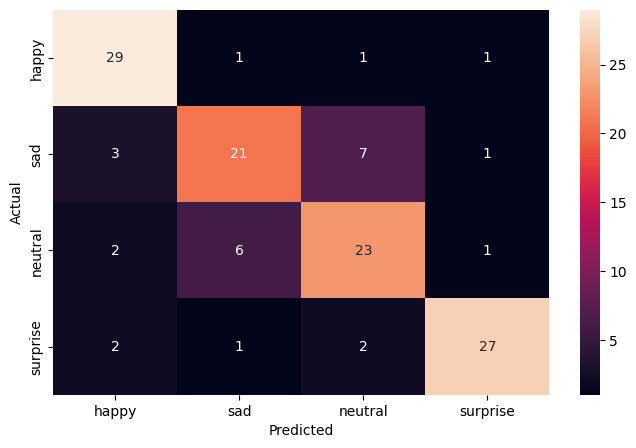

In [ ]:
# Plotting the confusion matrix for the chosen final model

from sklearn.metrics import classification_report, confusion_matrix

# Reload the test set with shuffle=False to maintain correct label order
test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False
)
test_images, test_labels = next(test_set)

# Generate predictions using the trained model3
pred = model3.predict(test_images)
pred = np.argmax(pred, axis=1)         # Get predicted class indices
y_true = np.argmax(test_labels, axis=1)  # Get true class indices

# Print the classification report for precision, recall, and f1-score
print(classification_report(y_true, pred, target_names=['happy', 'sad', 'neutral', 'surprise']))

# Compute and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
- The overall test accuracy is 78%, confirming strong performance on the test set.
- Happy and surprise classes are recognized best, with high precision (0.81 and 0.90) and recall (0.91 and 0.84). Most "happy" (29/32) and "surprise" (27/32) images are correctly classified.
- Sad and neutral classes show more confusion. "Sad" is often misclassified as "neutral" (7/32), and "neutral" is sometimes predicted as "sad" (6/32).
- The model rarely confuses "happy" and "surprise" with other classes, indicating it learns their distinct features well.
- Precision and recall are balanced across classes, but "sad" has the lowest recall (0.66), suggesting the model sometimes misses subtle cues for sadness.
- Misclassifications mainly occur between "sad" and "neutral," which may share similar facial features in the dataset.
- The model demonstrates robust generalization for the most expressive emotions, but could benefit from further tuning or data augmentation to better distinguish "sad" and "neutral."
  
Summary:

The complex CNN model is highly effective at distinguishing "happy" and "surprise," while "sad" and "neutral" are more challenging, likely due to subtle differences in facial expressions. Overall, the model provides reliable multi-class emotion classification.

## **Conclusion:**

### **Insights**

### **Refined insights**:
- The most meaningful insight is that facial emotion recognition from grayscale images is highly feasible using deep learning, especially with custom CNN architectures. The dataset is mostly balanced, but subtle emotions like "sad" and "neutral" are harder to distinguish, likely due to overlapping facial features. The model excels at recognizing more expressive emotions like "happy" and "surprise".

### **Comparison of various techniques and their relative performance**:
- **Custom CNNs (grayscale input):** Achieved the best results, with the complex CNN reaching 78% test accuracy. Simpler CNNs also performed well (65–67% accuracy).
- **Custom CNNs (RGB input):** Performed significantly worse than their grayscale counterparts, confirming that unnecessary color channels introduce noise for this dataset.
- **Transfer Learning (VGG16, ResNet101, EfficientNetV2B2):** All transfer learning models underperformed (25–51% accuracy), mainly due to the mismatch between the model’s expected RGB input and the actual grayscale data. VGG16 performed best among them but still lagged behind custom CNNs.
- **Improvement scope:** Further improvements are possible through advanced data augmentation, class weighting, hyperparameter tuning, and possibly ensembling multiple models. Addressing confusion between "sad" and "neutral" with more data or targeted augmentation could also help.


### **Proposal for the final solution design**:
- **Recommended model:** The complex custom CNN trained on grayscale images is the best solution. It outperforms all other approaches, generalizes well, and is tailored to the dataset’s characteristics.
- **Why this model:** It leverages the true nature of the data (grayscale), avoids unnecessary complexity, and achieves the highest accuracy. It is also more efficient than transfer learning models that require RGB input and large pre-trained weights.
- **Next steps:** For deployment, continue monitoring model performance, retrain with new data as available, and consider further fine-tuning or ensembling if higher accuracy is required.

# Recommendations for the Business Problems #

1. Optimize for High-Impact Emotion Detection Applications
   
Leverage the model in use cases where expressive emotions like happy, surprised, or angry are most relevant (e.g., customer satisfaction monitoring, interactive virtual agents, and gaming).

2. Avoid Color-Based Processing in Similar Contexts
   
Use grayscale image input pipelines in facial emotion detection systems where lighting and color variability add noise.

3. Improve Recognition of Subtle Emotions in Sensitive Applications
If the business domain requires distinguishing subtle emotions (e.g., sad vs. neutral in mental health monitoring or employee burnout detection), allocate additional resources to:

- Collect more nuanced training data

- Apply targeted data augmentation

- Use class rebalancing or custom loss functions

- Incorporate facial landmark-based features as auxiliary input

4. Avoid Out-of-the-Box Transfer Learning Models for Niche Domains
   
Do not use general-purpose transfer learning models (like ResNet, VGG, or EfficientNet) directly for grayscale facial emotion classification in business applications.

5. Deploy with a Feedback Loop for Continuous Learning
   
Establish a system to collect user feedback or ground-truth labels post-deployment to:

- Periodically retrain the model with updated datasets

- Monitor accuracy drift over time

- Identify emotion class confusion trends

6. Tailor Solutions Based on Industry Needs
   
| **Industry**                  | **Use Case**                  | **Model Adaptation Strategy**                                               |
| ----------------------------- | ----------------------------- | --------------------------------------------------------------------------- |
| Mental Health                 | Track sadness, anxiety        | Improve sad/neutral class accuracy, retrain with clinical datasets          |
| **Retail & Customer Service** | Gauge customer satisfaction   | Focus on detecting happy, angry, surprised expressions accurately           |
| **Education**                 | Detect engagement in students | Tune for attentive vs. bored expressions, possibly with additional context  |
| **Security & Surveillance**   | Identify unusual behavior     | Incorporate ensemble models with facial landmarks for more robust inference |
